Answer your own selection out of the following questions, or any other questions you might be able to think of.  Write the question down first in a markdown cell (use a # to make the question a nice header), THEN try to get an answer to it. A lot of these are remarkably similar, and some you'll need to do manual work for - the GDP ones, for example.

If you are trying to figure out some other question that we didn't cover in class and it does not have to do with joining to another data set, we're happy to help you figure it out during lab!

Take a peek at the billionaires notebook I uploaded into Slack, it should be helpful for the graphs (I added a few other styles and options, too). You'll probably also want to look at the "sum()" line I added.

*    What country are most billionaires from? For the top ones, how many billionaires per billion people?
*    Who are the top 10 richest billionaires?
*    What's the average wealth of a billionaire? Male? Female?
*    Who is the poorest billionaire? Who are the top 10 poorest billionaires?
*    'What is relationship to company'? And what are the most common relationships?
*    Most common source of wealth? Male vs. female?
*    Given the richest person in a country, what % of the GDP is their wealth?
*    Add up the wealth of all of the billionaires in a given country (or a few countries) and then compare it to the GDP of the country, or other billionaires, so like pit the US vs India
*    What are the most common industries for billionaires to come from? What's the total amount of billionaire money from each industry?
*    How many self made billionaires vs. others?
*    How old are billionaires? How old are billionaires self made vs. non self made? or different industries?
*    Who are the youngest billionaires? The oldest? Age distribution - maybe make a graph about it?
*    Maybe just made a graph about how wealthy they are in general?
*    Maybe plot their net worth vs age (scatterplot)
*    Make a bar graph of the top 10 or 20 richest

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('Billionaires.xlsx')

#### What country are most billionaires from? For the top ones, how many billionaires per billion people?

In [4]:
df=df[df['year']==2014]

In [5]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [6]:
countries=df.groupby('countrycode')['countrycode'].count().sort_values(ascending=False).head(10)
countries_df=pd.DataFrame(countries, columns=['countrycode'])
countries_df.rename(columns = {'countrycode':'count'}, inplace = True)

In [7]:
countries_df

,count
countrycode,
USA,499
CHN,152
RUS,111
DEU,85
BRA,65
IND,56
GBR,47
HKG,45
FRA,43


In [8]:
# this part im just looking up and manually adding
# i could have probably learned census.govs terrible api to automate this but for 10 countrie this was faster
countries_df['pop_thousands']=[323996, 1373541, 142355, 80723, 205824, 1266884, 64430, 7167, 66836, 62008]
countries_df['billionaires_per_billion']=countries_df['count']/(countries_df['pop_thousands']/100000)

In [9]:
countries_df

,count,pop_thousands,billionaires_per_billion
countrycode,,,
USA,499,323996,154.014247
CHN,152,1373541,11.066288
RUS,111,142355,77.974079
DEU,85,80723,105.298366
BRA,65,205824,31.580379
IND,56,1266884,4.420294
GBR,47,64430,72.947385
HKG,45,7167,627.877773
FRA,43,66836,64.336585


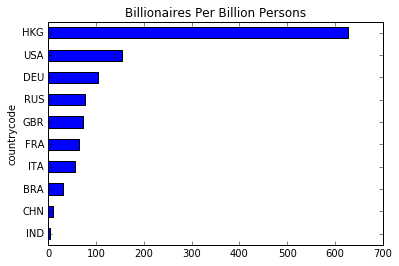

In [10]:
# this is my beautiful bargraph. hong kong clearly has it going on
countries_df.sort_values(by='billionaires_per_billion', ascending=True).plot(kind='barh', y='billionaires_per_billion', title='Billionaires Per Billion Persons', legend=False)

#### Who are the top 10 richest billionaires?

In [11]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [12]:
df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending=False).head(10)

,name,networthusbillion
284,Bill Gates,76.0
348,Carlos Slim Helu,72.0
124,Amancio Ortega,64.0
2491,Warren Buffett,58.2
1377,Larry Ellison,48.0
509,David Koch,40.0
381,Charles Koch,40.0
2185,Sheldon Adelson,38.0
429,Christy Walton,36.7
1128,Jim Walton,34.7


#### What's the average wealth of a billionaire? Male? Female?

In [13]:
df['networthusbillion'].describe()

count    1653.000000
mean        3.904658
std         5.748520
min         1.000000
25%         1.400000
50%         2.100000
75%         3.700000
max        76.000000
Name: networthusbillion, dtype: float64

In [14]:
df[['networthusbillion', 'gender']].groupby('gender').describe()

networthusbillion
gender                         
female count         180.000000
       mean            3.920556
       std             5.312604
       min             1.000000
       25%             1.400000
       50%             2.300000
       75%             3.700000
       max            36.700000
male   count        1473.000000
       mean            3.902716
       std             5.801227
       min             1.000000
       25%             1.400000
       50%             2.100000
       75%             3.700000
       max            76.000000

#### Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [15]:
df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending=True).head(10)

,name,networthusbillion
234,B.R. Shetty,1.0
2092,Rostam Azizi,1.0
2401,Tory Burch,1.0
734,Fred Chang,1.0
171,Angela Bennett,1.0
748,Fu Kwan,1.0
2107,Ryan Kavanaugh,1.0
1783,O. Francis Biondi,1.0
1371,Lam Fong Ngo,1.0
702,Feng Hailiang,1.0


In [16]:
# actually there are a lot more than 10 tied for poorest billionaires. here is the whole list!
df[df['networthusbillion']==1]['name']

56               Alberto Alcocer
81                 Alexander Vik
129                      An Kang
145     Andrea Reimann-Ciardelli
164              Andrew Gotianun
171               Angela Bennett
178                Anne Beaufour
234                  B.R. Shetty
261                  Bent Jensen
296                  Boris Mints
302                Brian Higgins
320                C. James Koch
343               Carlos Martins
358             Chang Pyung-Soon
424            Christopher Burch
482                Dariusz Milek
559                  Ding Shijia
560                Ding Shizhong
569               Dmitry Korzhev
573              Dmitry Troitsky
638               Elena Baturina
660             Enrique Banuelos
702                Feng Hailiang
734                   Fred Chang
748                      Fu Kwan
843               Graham Kirkham
886            Harindarpal Banga
914               Henri Beaufour
952         Horst Julius Pudwill
976                  Huo Qinghua
          

In [17]:
# 81 tied for poorest. 102 tied for second place.
df['networthusbillion'].value_counts().sort_index().head(10)

1.0     81
1.1    102
1.2     93
1.3     88
1.4     76
1.5     56
1.6     62
1.7     46
1.8     64
1.9     57
Name: networthusbillion, dtype: int64

In [18]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

#### 'What is relationship to company'? And what are the most common relationships?

In [19]:
# relationship to company looks like job title for the most part. looks like you want to get in 
# on the ground floor to make those B's
df['relationshiptocompany'].value_counts().head(10)

founder                                 818
relation                                515
owner                                    79
chairman                                 64
investor                                 30
Chairman and Chief Executive Officer     15
president                                 8
Chairman                                  8
CEO                                       8
ceo                                       8
Name: relationshiptocompany, dtype: int64

#### Most common source of wealth? Male vs. female?

In [20]:
df['sourceofwealth'].value_counts().head(10)

real estate        107
diversified         69
retail              63
investments         60
pharmaceuticals     42
hedge funds         34
banking             33
construction        32
media               24
consumer goods      19
Name: sourceofwealth, dtype: int64

In [21]:
df[['gender', 'sourceofwealth']].groupby('gender').describe()

sourceofwealth
gender                      
female count             172
       unique            100
       top       diversified
       freq                9
male   count            1464
       unique            578
       top       real estate
       freq              100

#### Given the richest person in a country, what % of the GDP is their wealth?

In [22]:
# this time i decided not to cheat and actually found and converted a gdp to country chart into a csv. here it is!
gdp=pd.read_csv('GDP.csv')
gdp

,Country,GDP (millions USD)
0,United States,17946996
1,China,10866444
2,Japan,4123258
3,Germany,3355772
4,United Kingdom,2848755
5,France,2421682
6,India,2073543
7,Italy,1814763
8,Brazil,1774725
9,Canada,1550537


In [23]:
networth=df[['name', 'citizenship', 'networthusbillion']]
networth=networth.rename(columns = {'citizenship':'Country'})

In [24]:
networth_gdp=pd.merge(networth, gdp, on='Country', how='left')

In [25]:
networth_gdp['percent_GDP']=(networth_gdp['networthusbillion']*1000000000)/(networth_gdp['GDP (millions USD)']*1000000)

In [26]:
# this doenst EXACTLY answer the question, but I think its more interesting anyway. top 20 people in the world by
# personal wealth as a percent of their own countrys gdp
networth_gdp.sort_values(by='percent_GDP', ascending=False).head(20)

,name,Country,networthusbillion,GDP (millions USD),percent_GDP
659,Jacky Xu,St. Kitts and Nevis,1.2,922,1.301518
1109,Nathan Kirsh,Swaziland,3.7,4060,0.911330
1407,Stephen Lansdown,Guernsey,2.4,2742,0.875274
751,John Fredriksen,Cyprus,13.6,19320,0.703934
182,Bidzina Ivanishvili,Georgia,5.2,13965,0.372359
341,David Nahmad,Monaco,1.8,6063,0.296883
447,Ezra Nahmad,Monaco,1.5,6063,0.247402
919,Lily Safra,Monaco,1.3,6063,0.214415
1402,Stelios Haji-Ioannou,Cyprus,3.1,19320,0.160455
1265,Rinat Akhmetov,Ukraine,12.5,90615,0.137946


#### Add up the wealth of all of the billionaires in a given country (or a few countries) and then compare it to the GDP of the country, or other billionaires, so like pit the US vs India

In [27]:
total_worth=pd.DataFrame(networth_gdp.groupby('Country')['networthusbillion'].sum())

In [28]:
total_worth['total_worth']=total_worth['networthusbillion']*1000000000

In [29]:
total_worth.index

Index(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Guernsey', 'Hong Kong', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Lebanon', 'Lithuania', 'Macau', 'Malaysia', 'Mexico', 'Monaco',
       'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Oman', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'Spain', 'St. Kitts and Nevis', 'Swaziland', 'Sweden', 'Switzerland',
       'Taiwan', 'Tanzania', 'Thailand', 'Turkey', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Venezuela',
       'Vietnam'],
      dtype='object', name='Country')

In [30]:
total_worth['Country']=total_worth.index

In [31]:
total_worth=pd.merge(total_worth, gdp, on='Country', how='left')

In [32]:
total_worth['GDP (millions USD)']=total_worth['GDP (millions USD)']*1000000

In [33]:
total_worth['GDP']=total_worth['GDP (millions USD)']

In [34]:
del total_worth['GDP (millions USD)']

In [35]:
total_worth['percent_by_billionaires']=total_worth['total_worth']/total_worth['GDP']

In [36]:
# here is the top ten countries by percent of gdp possessed by billionaires
total_worth[['Country', 'percent_by_billionaires']].sort_values(by='percent_by_billionaires', ascending=False).head(10)

,Country,percent_by_billionaires
54,St. Kitts and Nevis,1.301518
11,Cyprus,1.019669
55,Swaziland,0.911330
20,Guernsey,0.875274
35,Monaco,0.758700
21,Hong Kong,0.689513
17,Georgia,0.372359
48,Russia,0.318624
63,Ukraine,0.293550
30,Lebanon,0.261130


In [37]:
# and now us vs india
total_worth[['Country', 'percent_by_billionaires']].loc[total_worth['Country'].isin(['India', 'United States'])]

,Country,percent_by_billionaires
22,India,0.092547
66,United States,0.129403


#### What are the most common industries for billionaires to come from? What's the total amount of billionaire money from each industry?

In [38]:
df.groupby("industry")['networthusbillion'].count().sort_values(ascending=False)

industry
Consumer                           291
Real Estate                        190
Retail, Restaurant                 174
Diversified financial              132
Technology-Computer                131
Money Management                   122
Media                              104
Energy                              87
Non-consumer industrial             83
Technology-Medical                  78
Mining and metals                   68
Constrution                         61
Other                               59
Hedge funds                         43
Private equity/leveraged buyout     18
0                                    6
Venture Capital                      5
Name: networthusbillion, dtype: int64

In [39]:
df.groupby("industry")['networthusbillion'].sum().sort_values(ascending=False)

industry
Consumer                           1177.8
Retail, Restaurant                  820.9
Technology-Computer                 684.6
Diversified financial               614.4
Real Estate                         573.8
Media                               490.5
Money Management                    381.3
Energy                              340.5
Non-consumer industrial             298.4
Mining and metals                   240.6
Technology-Medical                  218.0
Other                               179.3
Constrution                         175.4
Hedge funds                         167.2
Private equity/leveraged buyout      71.9
Venture Capital                      11.1
0                                     7.6
Name: networthusbillion, dtype: float64

#### How many self made billionaires vs. others?

In [40]:
df.groupby('selfmade')['name'].count()

selfmade
inherited     505
self-made    1146
Name: name, dtype: int64

#### How old are billionaires? How old are billionaires self made vs. non self made? or different industries?

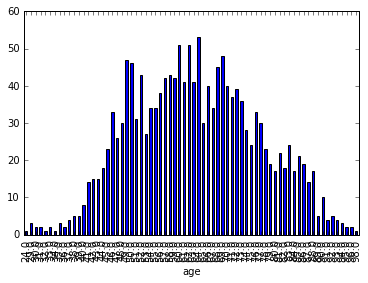

In [41]:
# this looks like a fairly normal curve
df.groupby('age')['selfmade'].count().plot(kind='bar')

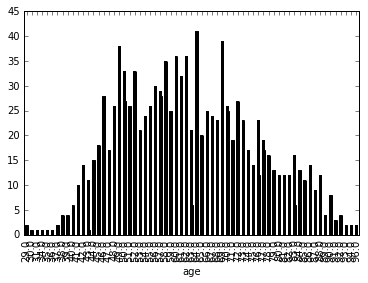

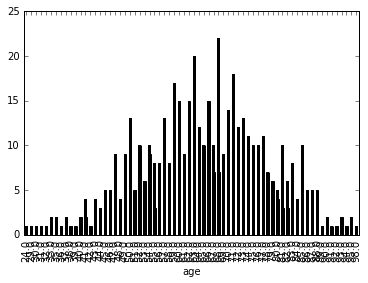

In [43]:
# seems like you generally get to be a billionaire faster if you're self made
df.loc[df['selfmade']=='self-made'].groupby('age').count().plot(kind='bar', legend=False)
df.loc[df['selfmade']=='inherited'].groupby('age').count().plot(kind='bar', legend=False)

#### Maybe plot their net worth vs age (scatterplot)

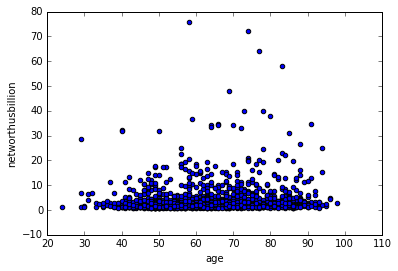

In [55]:
# comparing a number to itself to get rid of NaNs is a trick i learned from stackoverflow
# also this isnt a very good graph. nearly all of the billionaires at any age have 1 or near to 1 billion
df[['age', 'networthusbillion']].loc[df['age'] == df['age']].plot(kind='scatter', x='age', y='networthusbillion')